In [1]:
import tifffile
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
vliv_path = r"I:\20221013_data\liver_003_vliv.tif"
time_window= r"I:\20221013_data\liver_003_timewindows.tif"

MF_CPU_path = r"I:\20221013_data\liver_003_MF_CPU.tif"
MF_GPU_path = r"I:\20221013_data\liver_003_GPUfit\liver_003_MF_GPU.tif"

DF_CPU_path = r"I:\20221013_data\liver_003_DF_CPU.tif"
DF_GPU_path = r"I:\20221013_data\liver_003_GPUfit\liver_003_DF_GPU.tif"

MF_CPU = tifffile.imread(MF_CPU_path)
MF_GPU = tifffile.imread(MF_GPU_path)

DF_CPU = tifffile.imread(DF_CPU_path)
DF_GPU = tifffile.imread(DF_GPU_path)

with tifffile.TiffFile(vliv_path) as tif:
    n_points = len(tif.series)
    VLIV = tif.series[78].asarray()
    
with tifffile.TiffFile(time_window) as tif1:
    TW = tif1.series[78].asarray()
    
    print(VLIV.shape)
print(DF_GPU[79].shape)

plt.imshow(VLIV[0], 'gray')

a_GPU= MF_GPU[78, 288, 135]
a_CPU= MF_CPU[78, 288, 135]

b_GPU= DF_GPU[78, 288, 135]
b_CPU= DF_CPU[78, 288, 135]

fit_GPU = a_GPU*(1-np.exp(-TW*b_GPU))
fit_CPU = a_CPU*(1-np.exp(-TW*b_CPU))

Tw= TW*0.0128

plt.plot( Tw, VLIV[:, 288, 135], 'o')

plt.xlabel('Time window [s]'); plt.ylabel('VLIV')

plt.plot(Tw, fit_GPU , label = 'GPU-based fitting')
plt.plot(Tw, fit_CPU, label = 'CPU-based fitting')
plt.legend (loc='lower right')

plt.savefig('VLIV_fittedCurve.png', format='png', dpi=1200)


(31, 402, 512)
(402, 512)


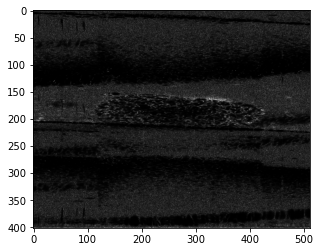

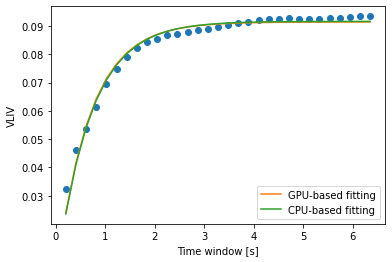

In [13]:
vliv_path =r"I:\Spheroid_data\MCF_spheroid_025\MCF7_Spheroid_20210707_025_vliv.tif"
time_window= r"I:\Spheroid_data\MCF_spheroid_025\MCF7_Spheroid_20210707_025_timewindows.tif"

MF_CPU_path = r"I:\Spheroid_data\MCF_spheroid_025\CPUfit_Processed\MCF7_Spheroid_20210707_025_MF.tif"
MF_GPU_path = r"I:\Spheroid_data\MCF_spheroid_025\GPUfit_Processed\MCF7_Spheroid_20210707_025_MF.tif"

DF_CPU_path = r"I:\Spheroid_data\MCF_spheroid_025\CPUfit_Processed\MCF7_Spheroid_20210707_025_DF.tif"
DF_GPU_path = r"I:\Spheroid_data\MCF_spheroid_025\GPUfit_Processed\MCF7_Spheroid_20210707_025_DF.tif"

MF_CPU = tifffile.imread(MF_CPU_path)
MF_GPU = tifffile.imread(MF_GPU_path)

DF_CPU = tifffile.imread(DF_CPU_path)
DF_GPU = tifffile.imread(DF_GPU_path)


with tifffile.TiffFile(vliv_path) as tif:
    n_points = len(tif.series)
    VLIV = tif.series[60].asarray()
    
with tifffile.TiffFile(time_window) as tif1:
    TW = tif1.series[60].asarray()
    
print(VLIV.shape)
print(DF_GPU[60].shape)

plt.figure()
plt.imshow(VLIV[0], 'gray')

a_GPU = MF_GPU[60, 271, 188]
a_CPU = MF_CPU[60, 271, 188]

b_GPU = DF_GPU[60, 271, 188]
b_CPU = DF_CPU[60, 271, 188]

fit_GPU = a_GPU*(1-np.exp(-TW*b_GPU))
fit_CPU = a_CPU*(1-np.exp(-TW*b_CPU))

Tw = TW * 0.0128


plt.figure()
plt.plot( Tw, VLIV [:, 271, 188], 'o')

plt.xlabel('Time window [s]'); plt.ylabel('VLIV')

# plt.figure()
plt.plot(Tw, fit_GPU , label = 'GPU-based fitting')
plt.plot(Tw, fit_CPU, label = 'CPU-based fitting')
plt.legend (loc='lower right')
plt.savefig('VLIV_fittedCurve.png', format='png', dpi=1200)

